<a href="https://colab.research.google.com/github/nasyawa/Kuis2_MachineLearning/blob/main/22_Nasyawa_Ramadhia_Kuis2_OCR_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Kuis 2 Machine Learning**

**Nasyawa Ramadhia Kirana Sava E // 2141720011 // 22**

# Import Library

In [ ]:
import tensorflow as tf  #untuk komputasi numerik dan pengmbangan model
import numpy as np  #untuk komputasi numerik dalam python dan struktur data array
import pandas as pd #untuk mengatur/manipulasi dan analisis data
import matplotlib.pyplot as plt #membuat visualisai grafik,plot
import seaborn as sns #pembuatan visualisasi data yang lebih menarik dan informatif
from sklearn.preprocessing import LabelBinarizer #untuk mengonversi label kategori menjadi biner
from sklearn.model_selection import train_test_split # pemisahan datset jd subtraining/testing
from sklearn.metrics import classification_report #mencetak laporan eval klasifikasi
import zipfile #mengekstrak/membuat file zip di python

**penjelasan:**
Mengimpor beberapa pustaka dan modul

# Load Dataset

## Load MNIST

In [ ]:
from tensorflow.keras.datasets import mnist

**penjelasan:**
Mengimpor dataset MNIST dari pustaka TensorFlow, dataset ini uda disediakan scara default.

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**penjelasan:**

traindata trainlabel ini data latihan yg terdiri dari gambar/tulisan angka

testdata, testlabel ini data ujinya

mnistloaddata, mengakses data dan siapa melatih menguji model

In [ ]:
# Check shape data
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

**penjelasan:**
menampilkan bentuk/dimensi dari data latihan (train_data) dan data uji (test_data) yang telah dimuat dari dataset MNIST

hasilnya train_data = (60000, 28, 28)
maka,  terdapat 60,000 gambar dalam data latihan, di mana setiap gambar memiliki dimensi 28x28 piksel

hasilnya test_data = (10000, 28, 28)
maka, 10,000 gambar dalam data uji, dg dimensi 28x28 piksel untuk setiap gambar.

In [ ]:
# Check shape labels
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

**penjelasan:**
memeriksa dimensi atau jumlah label pada data latih dan data uji.

(60000) ini, terdapat 60,000 label yang sesuai dengan 60,000 gambar dalam data latihan

(10000) ini, terdapat 10,000 label yang sesuai dengan 10,000 gambar dalam data uji.

In [ ]:
# Check each data shape --> should be 28*28
train_data[0].shape

(28, 28)

**penjelasan:**
untuk ngecek dimensi/bentuk

hasil diatas menunjukan bahwa data latihan (train_data) memiliki dimensi 28x28 pikse

In [ ]:
# Check the label
train_labels.shape

(60000,)

hasil diatas menunjukkan bahwa terdapat 60,000 label dalam dataset latihan.

### Combine Train and Test Data

In [ ]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

**penjelasan:**

menggabungkan data dari dataset

- digitdata = dari gabungan data latih dan data uji
- digitlabel = gabungan seluruh label

kode:
- np.vstack = fungsi numpy yang melakukan penggabungan secara **v**ertikal
- np.hstack = fungsi numpy yg penggabungan **h**orizontal

In [ ]:
# Check data shape
digits_data.shape

(70000, 28, 28)

**penjelasan:**

kode ini melihat/mengecek dimensi dari data gabungan

maksud dari hasil (70000,28,28) :
- digit_data punya bentuk yg 70000 gambar dg pixel tiap gambar 28x28


In [ ]:
# Check label shape
digits_labels.shape

(70000,)

hasil diatas menunjukan : digits_labels sekarang memiliki bentuk yang terdiri dari 70,000 label. Angka 70,000 adalah hasil dari penggabungan 60,000 label dari dataset latihan dan 10,000 label dari dataset uji.

Text(0.5, 1.0, 'Class: 9')

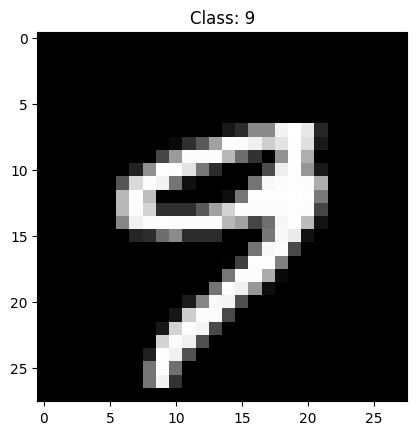

In [ ]:
# Randomly checking the data
idx = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[idx], cmap='gray')
plt.title('Class: ' + str(digits_labels[idx]))

**penjelasan**

dengan kode ini, akan menampilkan gambar secara acak dari dataset (digit_data) dan lenlnya (digit_label)

idx = memilih scara acak  indeks dri dataset
pltimshow= menampilkan
plttitle = memberi judul

<Axes: xlabel='Labels', ylabel='count'>

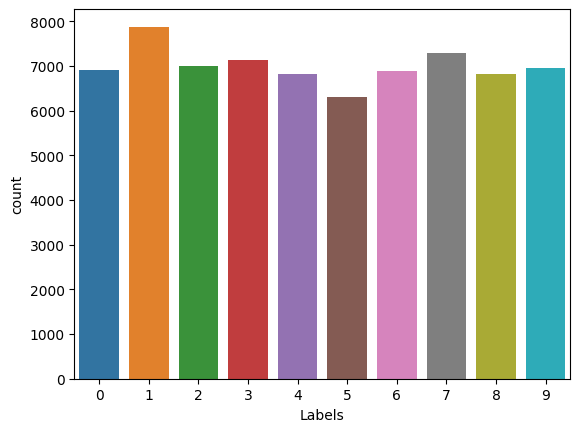

In [ ]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
sns.countplot(df_labels, x='Labels')

**penjelasan:**

kode ini menampilkan distribusi label memberikan gambaran visual berupa diagram batang

dengan ini kita bisa mengetahui apakah dataset memiliki distribusi yang seimbang antara kelas-kelas digit.

Dan dari hasil diatas, relatif seimbang



## Load Kaggle A-Z

In [ ]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-05 08:45:31--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   242MB/s    in 0.8s    

2023-12-05 08:45:32 (242 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [ ]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close() #menutup objek zip yang telah dibuka

**penjelasan:**

Mengekstrak / Meng-unzip file alfabeto_A-Z.zip
- ZipFile() dari pustaka zipfile, untukmembuat objek yang merepresentasikan file zip
- metode extractall(), untuk mengekstrak semua isi dari file zip




In [ ]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**penjelasan:**

membaca file CSV bernama 'A_Z Handwritten Data.csv' dan menyimpannya ke dalam DataFrame Pandas dengan nama dataset_az. Kemudian, seluruh nilai dalam DataFrame tersebut diubah menjadi tipe data float32.

Hasil diatas, menunjukan dataset punya 372.450 (row) baris dan 785 (column) kolom

In [ ]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only
alphabet_labels = dataset_az['0']

**penjelasan**

Dataset dibagi jadi 2 bagian
- alphabet_data, berisi data piksel dari gambar huruf tangan
- alphabet_labels, berisi label yg sesuai

In [ ]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [ ]:
# Check shape labels
alphabet_labels.shape

(372450,)

**penjelasan**

- alphabet_data.shape,
memiliki 372,450 sampel (baris) dan 784 fitur (kolom)

- alphabet_labels.shape,
372,450 label atau kelas yang sesuai dengan setiap gambar

In [ ]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
alphabet_data.shape

(372450, 28, 28)

**penjelasan:**

- menggunakan fungsi np.reshape() dari NumPy untuk mengubah ulang struktur
- alphabet_data.values digunakan untuk mendapatkan nilai-nilai dalam bentuk array NumPy

- Hasilnya,
alphabet_data sekarang berisi 372,450 gambar, dan setiap gambar direpresentasikan sebagai matriks 28x28 piksel setelah proses reshape yang telah dilakukan


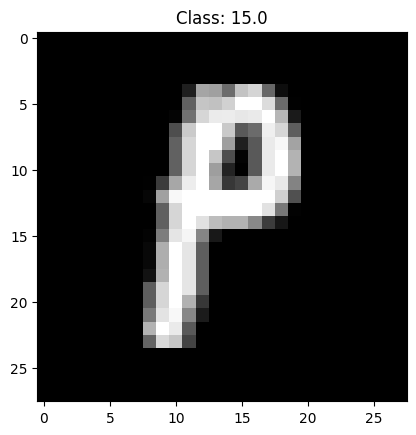

In [ ]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0]) # memilih gambar secara acak
plt.imshow(alphabet_data[index], cmap = 'gray') # menampilkan gambar yang dipilih secara acak
plt.title('Class: ' + str(alphabet_labels[index]));

**penjelasan**

- cmap='gray' mengatur warna plot sebagai grayscale, karena dataset ini berisi gambar-gambar dalam skala abu-abu (grayscale).

- hasilnya, tampilan gambar huruf A-Z secara acak diatas adalah S

<Axes: xlabel='Labels', ylabel='count'>

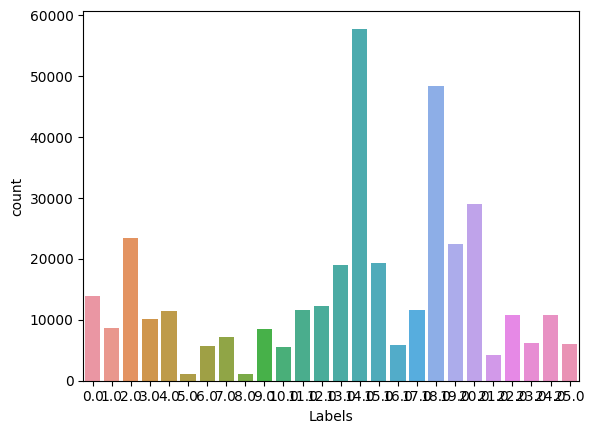

In [ ]:
# Check data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
sns.countplot(df_az_labels, x='Labels')

**penjelasaan**


Hasil diatas menunjukan gambaran visual tentang seberapa sering masing-masing huruf (kelas) muncul dalam dataset

- x (horizontal) menunjukkan label atau kelas dari huruf A sampai Z (0-25).
-  y (vertikal) menunjukkan jumlah frekuensi atau kemunculan setiap label atau kelas pada dataset

## Combine Dataset (MNIST + Kaggel A-Z)

In [ ]:
# Check unique value from digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

untuk menemukan nilai unik atau kelas yang berbeda dari label-label dalam dataset MNIST

In [ ]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

 untuk menemukan nilai unik atau kelas yang berbeda dari label-label dalam dataset huruf A-Z.

In [ ]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10

 operasi ini bertujuan untuk menggeser atau menambahkan nilai pada label-label dari dataset huruf A-Z sebesar 10


In [ ]:
# check alphabet labels again
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

- np.unique() digunakan untuk mengidentifikasi dan menampilkan daftar nilai unik dari suatu array.

- Jika sebelumnya label huruf A-Z memiliki rentang nilai 0-25,
setelah penambahan 10 pada setiap elemen label huruf A-Z (alphabet_labels += 10),
Rentang nilai label akan berubah menjadi 10-35



In [ ]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

- np.vstack() untuk menggabungkan data piksel dari kedua dataset (alphabet_data dan digits_data) ke dalam satu array data
- np.hstack() untuk menggabungkan label-label dari kedua dataset (alphabet_labels dan digits_labels) ke dalam satu array labels.


In [ ]:
# Check the shape
data.shape, labels.shape #meriksa bentuk data dan label

((442450, 28, 28), (442450,))

In [ ]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [ ]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

**penjelasan**
mengonversi array data ke dalam tipe data float32 untuk memastikan konsistensi tipe data dalam pemrosesan data.

In [ ]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

**penjelasn**
- np.expand_dims() untuk menambahkan dimensi terakhir (axis=-1) ke array data


# Preprocessing

In [ ]:
# Normalize data
data /= 255.0

**penjelasan:**
normalisasi pada data

Normalisasi sering digunakan dalam proses pra-pemrosesan untuk membantu dalam konvergensi yang lebih baik saat melatih model.

In [ ]:
# Check range value of data
data[0].min(), data[0].max()

(0.0, 1.0)

**penjelsan:** memeriksa rentang nilai piksel dari gambar pertama dalam dataset setelah normalisasi dilakukan.

In [ ]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)

**penjelasan:**
- le = mengkodekan label-label kelas menjadi format yang sesuai dengan one-hot encoding
- fit_transform() untuk  transformasi label" kelas ke dalam bentuk biner yang diperlukan untuk pelatihan model machine learning, khususnya untuk tugas klasifikasi.

In [ ]:
# Check labels shape
labels.shape

(442450, 36)

**penjelasan**

 memeriksa bentuk array labels setelah proses one-hot encoding
 untuk memastikan bahwa label-label telah diubah menjadi bentuk biner yang tepat.


Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

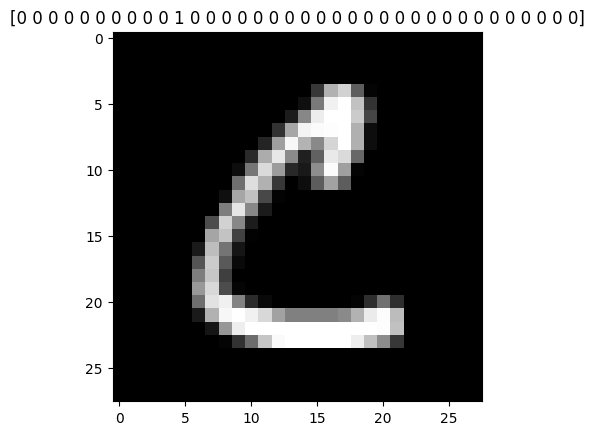

In [ ]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

#menampilkan gambar dari data ke-30000 dalam format yang sesuai (28x28 piksel)
#menampilkan label biner yang sesuai dengan gambar tersebut sebagai judul.

In [ ]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [ ]:
# Check the biggest value of data
classes_total.max()

57825

In [ ]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

penanganan ketidakseimbangan kelas dengan memberikan bobot (weights) pada setiap kelas

- labels.sum(axis=0),hitung jumlah total sampel untuk setiap kelas
- perhitungan bobot (weights) untuk setiap kelas dengan menghitung nilai maksimum jumlah sampel dibagi dengan jumlah sampel untuk setiap kelas.


# Split Data to Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

Subset X_train dan y_train digunakan untuk melatih model, sementara subset X_test dan y_test digunakan untuk menguji kinerja model yang telah dilatih.

## Create Data Augmentation

In [ ]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

**penjelasan**

Augmentasi data = teknik yang  digunakan untuk memperluas dataset pelatihan dg membuat variasi dri gambar yang ada, guna meningkatkan keberagaman dataset yg digunakan untk melatih model.

-ImageDataGenerator dari TensorFlow Keras untuk melakukan augmentasi data


# Build CNN Model

In [ ]:
# Import library
from tensorflow.keras.models import Sequential
#membuat model secara berurutan
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
#  beberapa jenis lapisan (layers)
from tensorflow.keras.callbacks import ModelCheckpoint
# fungsi callback, untk menyimpan model ke dlm file tertentu selama proses pelatihan,

In [ ]:
# Build the network
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

**penjelasan**

 untuk membangun arsitektur sebuah model neural network dengan menggunakan TensorFlow Keras
- network = Sequential(), Membuat objek model neural network dri sequntial

tambahan lapisan
- lapisan konvolusi pertama dengan 32 filter
- lapisan konvolusi kedua dengan 64 filter
- lapisan konvolusi ketiga dengan 128 filter

Lapisan Flatten() untuk meratakan output dari lapisan sebelumnya menjadi array 1D.


In [ ]:
# Check network summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [ ]:
# Create actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Train model

In [ ]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model' #menentukan nama file
epochs = 20 # jumlah iteras
batch_size = 128 #menentukan jumlah sampel data

In [ ]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

**penjelasan**
- menyiapkan parameter-parameter yang akan digunakan dalam proses pelatihan model,
- menyiapkan fungsi callback untuk menyimpan model selama proses pelatihan


Model akan dilatih selama 20 epoch dengan ukuran batch sebesar 128, dan selama proses pelatihan, model akan disimpan setiap kali terjadi perbaikan (penurunan) pada nilai val_loss

In [ ]:
# Fit the model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2764/2765 [============================>.] - ETA: 0s - loss: 2.1613 - accuracy: 0.8264
Epoch 1: val_loss improved from inf to 0.25086, saving model to custom_ocr.model
2765/2765 [==============================] - 146s 48ms/step - loss: 2.1613 - accuracy: 0.8264 - val_loss: 0.2509 - val_accuracy: 0.8987
Epoch 2/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.9889 - accuracy: 0.9011
Epoch 2: val_loss improved from 0.25086 to 0.25054, saving model to custom_ocr.model
2765/2765 [==============================] - 161s 58ms/step - loss: 0.9887 - accuracy: 0.9011 - val_loss: 0.2505 - val_accuracy: 0.8953
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8231 - accuracy: 0.9130
Epoch 3: val_loss improved from 0.25054 to 0.23458, saving model to custom_ocr.model
2765/2765 [==============================] - 181s 65ms/step - loss: 0.8231 - accuracy: 0.9130 - val_loss: 0.2346 - val_accuracy: 0.9045
Epoch 4/20
2765/2765 [=========================

dengan network.fit(), model akan dilatih menggunakan data yang telah dipersiapkan sebelumnya

memonitor performa model pada data validasi.


# Evaluate Model

## Make a Single Prediction

In [ ]:
# make a prediction
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 3s 3ms/step


In [ ]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1]

array([7.7405539e-20, 2.4896229e-12, 1.4105596e-10, 6.6101879e-15,
       9.8981104e-16, 9.5232482e-11, 2.1616679e-13, 2.7001402e-13,
       9.6738336e-17, 1.1592414e-18, 4.3739516e-16, 3.1002655e-12,
       1.2844454e-12, 3.2010345e-12, 1.7569295e-11, 1.5333880e-16,
       1.0670681e-10, 2.0791640e-14, 9.9934536e-01, 6.5392355e-04,
       2.6861719e-14, 8.7042142e-09, 1.5059009e-14, 1.1789099e-15,
       5.2635804e-12, 1.1809305e-12, 3.2850727e-13, 2.9172817e-17,
       9.8359744e-11, 4.5378428e-07, 1.2818959e-11, 7.2184619e-19,
       3.1845961e-17, 6.9870753e-16, 9.3542626e-14, 1.8210731e-07],
      dtype=float32)

In [ ]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1])

18

In [ ]:
# Check label for 24
name_labels[18]

'I'

In [ ]:
# Check y_test label for 0
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# check the highest value
np.argmax(y_test[1])

18

In [ ]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])]

'S'

**penjelasan**
Kode diatas  melakukan prediksi menggunakan model yang telah dilatih, mengevaluasi hasil prediksi, dan membandingkan prediksi model dengan label asli dari dataset pengujian

1. Melakukan prediksi,

 prediksi pada data pengujian (X_test). Prediksi akan menghasilkan probabilitas kelas untuk setiap sampel data.
2. Melihat Probabilitas satu data,
3. Mencari indeks kelas dengan probabilitas tertinggi dari hasil prediksi pada sampel data dengan indeks ke-1.
4. Mengeccek Label

  Mengambil label atau nama yang sesuai dengan kelas ke-18 (indeks ke-18) dari dataset label.
5. Mengecek Label pada y_test dan y_test




## Make an Evaluation on Test Data

In [ ]:
# Evaluate on test data
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 10s 3ms/step - loss: 0.1536 - accuracy: 0.9427


[0.1536012440919876, 0.9426602125167847]

**penjelasn**

mengevaluasi kinerja model neural network pada data pengujian (X_test) dengan menggunakan label yang sesuai (y_test)

Hasilnya
-  mencakup nilai akurasi dari model pada data pengujian.
- Metrik-metrik ini memberikan pemahaman tentang seberapa baik model dapat memprediksi label yang benar untuk data yang belum pernah dilihat sebelumnya.

In [ ]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.30      0.73      0.42      1381
           1       0.98      0.99      0.98      1575
           2       0.91      0.97      0.94      1398
           3       0.98      0.99      0.98      1428
           4       0.88      0.98      0.93      1365
           5       0.59      0.96      0.73      1263
           6       0.96      0.98      0.97      1375
           7       0.95      0.99      0.97      1459
           8       0.98      0.98      0.98      1365
           9       0.98      0.97      0.97      1392
           A       0.99      0.99      0.99      2774
           B       0.99      0.99      0.99      1734
           C       0.98      0.99      0.99      4682
           D       0.94      0.96      0.95      2027
           E       0.99      0.99      0.99      2288
           F       0.97      1.00      0.99       233
           G       0.96      0.95      0.96      1152
           H       0.99    

**penjelasn**

 mencetak laporan klasifikasi yang memberikan info rinci ttg kinerja model dlm melakukan klasifikasi pada data pengujian.

 - fungsi dari modul sklearn.metrics
 - y_test.argmax(axis=1),label asli dari data uji yg diubah jdi bentuk satu-hot encoded.
 - predictions.argmax(axis=1), hasil prediksi


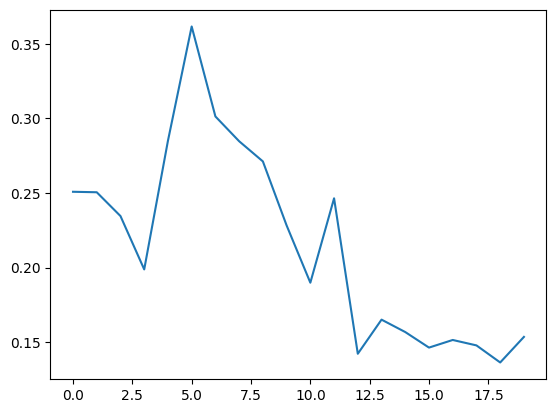

In [ ]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])

visualisasi grafik yang menampilkan perubahan nilai loss pada setiap epoch selama proses pelatihan model,

In [ ]:
# You can also check the another metrics
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

mengakses kunci atau nama-nama metrik yang disimpan dalam variabel history

history berisi info metrik seperti loss, akurasi, val_loss, dan val_accuracy yang dihitung pada setiap epoch selama proses pelatihan.

- loss: Nilai loss pada tiap epoch pada data latih.
- accuracy: Nilai akurasi pada tiap epoch
- val_loss: Nilai loss pada tiap epoch pada data validasi.
- val_accuracy: Nilai akurasi pada tiap epoch pada data validasi.

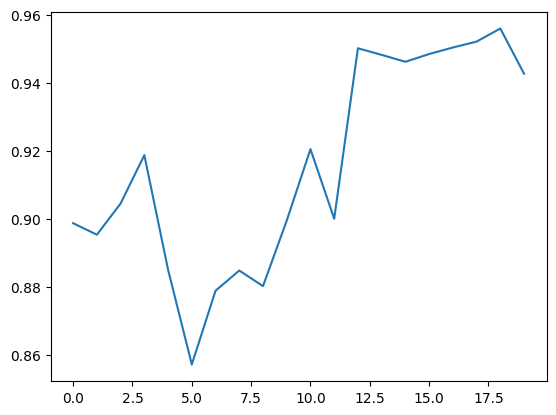

In [ ]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])

# membuat visualisasi grafik

untuk membuat visualisasi grafik yang menampilkan perubahan nilai akurasi pada setiap epoch selama proses pelatihan model pada data validasi.

# Save The Model

In [ ]:
# The result will show in colab directory
network.save('network', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


untuk menyimpan model neural network ke dalam file dalam format Hierarchical Data Format version 5 (HDF5)

Fungsi ini berasal dari API Keras/TensorFlow yang digunakan untuk menyimpan model ke dalam file pada sistem penyimpanan (disk).

# Testing on Real Image

In [ ]:
# Import library
from tensorflow.keras.models import load_model

tensorflow.keras.models. Fungsi ini digunakan untuk memuat kembali model yang telah disimpan sebelumnya.

In [ ]:
# Load saved network
load_network = load_model('network')

untuk memuat model neural network yang disimpan dengan nama 'network'

In [ ]:
# Check summary
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

menampilkan ringkasan (summary) dari model neural network

In [ ]:
#Load Gdrive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/MACHINE LEARNING/b_small.jpeg')
cv2_imshow(img)

Memuat gambar dari path yang telah ditentukan ke dalam variabel img kemudian Menampilkan gambar yang telah dimuat.

In [ ]:
# Check shape
img.shape

melihat dimensi/gambar (shape) gambar telah dimuat

In [ ]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

Mengonversi gambar ke dalam format grayscale kemudian melihat dimensi (shape) dari gambar grayscale yang dihasilkan.

In [ ]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

proses binarisasi pada gambar menggunakan metode thresholding Otsu kemudian menampilkan gambar hasil thresholding.

In [ ]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

Mengubah ukuran gambar menjadi 28x28 piksel,

In [ ]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

Mengonversi gambar menjadi tipe float32 kemudian melakukan normalisasi nilai piksel.

In [ ]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

memperluas dimensi gambar agar sesuai dengan input yang diharapkan oleh model (28x28x1).

In [ ]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

Melakukan prediksi label, pred_label akan berisi label yang diprediksi untuk gambar yang dimasukkan.

In [ ]:
# check label for 6
name_labels[6]

Mengecek label yang sesuai dengan nilai label 6 dari dataset.